# Loading dataset

In [16]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

%matplotlib inline

# Preprocessing data

In [2]:
print(train_data[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [3]:
train_labels[0]


3

In [4]:
# Vectorize the data
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
x_train[0]

array([ 0.,  1.,  1., ...,  0.,  0.,  0.])

In [6]:
# one hot encode the output labels
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

# Building the network

In [11]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [12]:
# Compiling the model
from keras import losses
model.compile(optimizer='rmsprop', loss=losses.binary_crossentropy, metrics=['accuracy'])

# Training the model

In [13]:
# Setting asize a validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [14]:
# training
history = model.fit(partial_x_train, 
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s - loss: 0.0731 - acc: 0.9806 - val_loss: 0.0497 - val_acc: 0.9857
Epoch 2/20
7982/7982 [==============================] - 1s - loss: 0.0421 - acc: 0.9886 - val_loss: 0.0395 - val_acc: 0.9895
Epoch 3/20
7982/7982 [==============================] - 1s - loss: 0.0328 - acc: 0.9912 - val_loss: 0.0355 - val_acc: 0.9906
Epoch 4/20
7982/7982 [==============================] - 1s - loss: 0.0271 - acc: 0.9926 - val_loss: 0.0329 - val_acc: 0.9912
Epoch 5/20
7982/7982 [==============================] - 1s - loss: 0.0225 - acc: 0.9937 - val_loss: 0.0314 - val_acc: 0.9915
Epoch 6/20
7982/7982 [==============================] - 1s - loss: 0.0189 - acc: 0.9946 - val_loss: 0.0308 - val_acc: 0.9915
Epoch 7/20
7982/7982 [==============================] - 1s - loss: 0.0159 - acc: 0.9953 - val_loss: 0.0309 - val_acc: 0.9915
Epoch 8/20
7982/7982 [==============================] - 1s - loss: 0.0134 - a

# Visualization

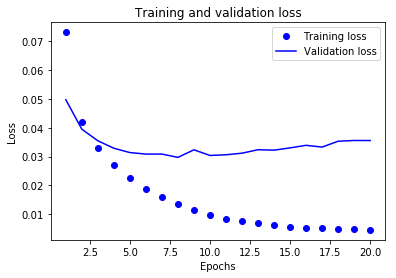

In [15]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

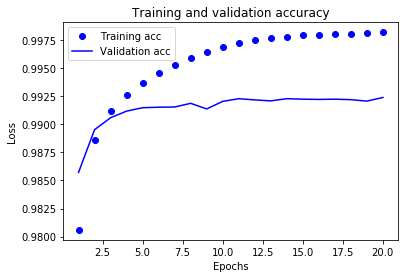

In [17]:
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Predicting

In [18]:
predictions = model.predict(x_test)

In [19]:
predictions[0]

array([  2.71358713e-05,   8.45245154e-08,   1.65034439e-08,
         9.92732942e-01,   6.84197294e-03,   4.35698041e-07,
         1.98493240e-08,   4.62309941e-07,   5.55553652e-06,
         4.77765582e-07,   3.77896640e-06,   8.74592661e-05,
         2.35265276e-07,   3.29881368e-05,   3.75605040e-08,
         4.89517937e-08,   4.02032629e-06,   7.50277195e-07,
         1.36718782e-07,   1.30566013e-05,   3.72311733e-05,
         3.19076150e-07,   3.57149361e-07,   1.27629858e-06,
         5.61928903e-09,   1.21464822e-07,   1.75877313e-09,
         1.27079909e-06,   2.91943621e-07,   6.53611278e-05,
         3.40011457e-06,   3.86479286e-07,   1.46847833e-06,
         1.02853971e-06,   1.30540229e-07,   3.61166208e-08,
         1.08024571e-04,   1.46420405e-07,   2.60793556e-08,
         2.58786149e-05,   4.33194288e-07,   5.22744621e-08,
         7.37758832e-09,   1.27440364e-06,   9.85082327e-09,
         4.41660113e-08], dtype=float32)

In [20]:
predictions[0].sum()

1.0000001

In [21]:
np.argmax(predictions[0])

3

# Avoiding overfitting

Reduce the number of epoch, observed from plot. Which in this case is 9

In [24]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

# Compiling the model
from keras import losses
model.compile(optimizer='rmsprop', loss=losses.binary_crossentropy, metrics=['accuracy'])

history = model.fit(partial_x_train, 
                   partial_y_train,
                   epochs=9,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s - loss: 0.0784 - acc: 0.9798 - val_loss: 0.0529 - val_acc: 0.9849
Epoch 2/9
7982/7982 [==============================] - 1s - loss: 0.0439 - acc: 0.9878 - val_loss: 0.0404 - val_acc: 0.9891
Epoch 3/9
7982/7982 [==============================] - 1s - loss: 0.0333 - acc: 0.9910 - val_loss: 0.0362 - val_acc: 0.9902
Epoch 4/9
7982/7982 [==============================] - 1s - loss: 0.0270 - acc: 0.9924 - val_loss: 0.0331 - val_acc: 0.9910
Epoch 5/9
7982/7982 [==============================] - 1s - loss: 0.0222 - acc: 0.9936 - val_loss: 0.0319 - val_acc: 0.9912
Epoch 6/9
7982/7982 [==============================] - 1s - loss: 0.0184 - acc: 0.9946 - val_loss: 0.0309 - val_acc: 0.9915
Epoch 7/9
7982/7982 [==============================] - 1s - loss: 0.0152 - acc: 0.9955 - val_loss: 0.0301 - val_acc: 0.9921
Epoch 8/9
7982/7982 [==============================] - 1s - loss: 0.0129 - acc: 0.99

In [26]:
predictions = model.predict(x_test)

In [27]:
np.argmax(predictions[0])

3